In [9]:
# Learn from notebook


# configs

In [ ]:
import pandas as pd

In [3]:
pd.options.display.max_columns = None

# DATA

In [7]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [8]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#we have 20640 rows (districts) with 10 columns
# 

In [1]:
# reading the data

# imports

In [1]:
import pandas as pd

# config

In [2]:
# setting up how much we need to display
pd.options.display.max_columns = None

# DATA

In [3]:
df = pd.read_csv("./datasets/housing/housing.csv")

In [4]:
df.shape

(20640, 10)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# problem statement.

*Task : predict the median_house_value*

We have the input table contains data points corresponding to each district: identified with the combination of longitude and latitude

In [7]:
# checking the counts
print(
    "data count", len(df),
)
print(
    "primary count", df[['longitude', 'latitude']].apply(lambda x: f"{x['longitude']}_{x['latitude']}", axis=1).nunique()
)

data count 20640
primary count 12590


In [14]:
# why so

In [8]:
df_temp = df.copy()

In [9]:
df_temp['lnlat'] = df_temp[['longitude', 'latitude']].apply(lambda x: f"{x['longitude']}_{x['latitude']}", axis=1)

In [10]:
df_temp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,lnlat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122.23_37.88
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122.22_37.86
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.24_37.85
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.25_37.85
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.25_37.85


In [11]:
# getting the count

In [17]:
record_count_per_lnlat = df_temp.groupby("lnlat").size().reset_index(name="count")

In [19]:
record_count_per_lnlat[record_count_per_lnlat['count']>1].sort_values(by="count", ascending=False)

,lnlat,count
11637,-122.41_37.8,15
11663,-122.42_37.8,11
11706,-122.44_37.78,11
11708,-122.44_37.8,10
11707,-122.44_37.79,10
...,...,...
4313,-118.23_33.97,2
4315,-118.23_33.99,2
4318,-118.23_34.07,2
4322,-118.23_34.12,2


In [20]:
# we are seeing more than one record with maximum of 15 having same latitude and longitude

In [21]:
df_temp[df_temp['lnlat']=="-122.41_37.8"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,lnlat
491,-122.41,37.8,52.0,1394.0,395.0,1700.0,400.0,2.7500,168800.0,NEAR BAY,-122.41_37.8
1789,-122.41,37.8,52.0,812.0,252.0,629.0,247.0,2.5875,500001.0,NEAR BAY,-122.41_37.8
7181,-122.41,37.8,52.0,1999.0,642.0,1846.0,620.0,1.9145,225000.0,NEAR BAY,-122.41_37.8
7995,-122.41,37.8,52.0,2892.0,751.0,1785.0,733.0,3.5746,350000.0,NEAR BAY,-122.41_37.8
8545,-122.41,37.8,52.0,2618.0,611.0,1328.0,559.0,4.1607,350000.0,NEAR BAY,-122.41_37.8
8773,-122.41,37.8,52.0,1288.0,309.0,437.0,272.0,6.3245,500001.0,NEAR BAY,-122.41_37.8
10878,-122.41,37.8,52.0,2583.0,672.0,1335.0,613.0,3.1477,500001.0,NEAR BAY,-122.41_37.8
10979,-122.41,37.8,52.0,3697.0,837.0,1446.0,711.0,5.8660,500001.0,NEAR BAY,-122.41_37.8
15430,-122.41,37.8,52.0,1866.0,748.0,2957.0,710.0,1.8295,243800.0,NEAR BAY,-122.41_37.8
16867,-122.41,37.8,52.0,2450.0,741.0,1415.0,664.0,2.8229,375000.0,NEAR BAY,-122.41_37.8


In [22]:
# we have.

In [8]:
# Know the data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
# total_bedrooms has some missing values.
# other field are seems okay.any way there are outliers. since moving from 75% to max show high magnitude changes
# for
# total rooms
# total_bedrooms
# population
# households
# etc.

# median_income field seems 

In [12]:
# we have only one object value here.

In [13]:
df.describe(include=["object"]).T

,count,unique,top,freq
ocean_proximity,20640,5,<1H OCEAN,9136


In [14]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
# ISLAND           5 we don't see much data here. Need to check what to do here.

In [16]:
#Visually representing the features.

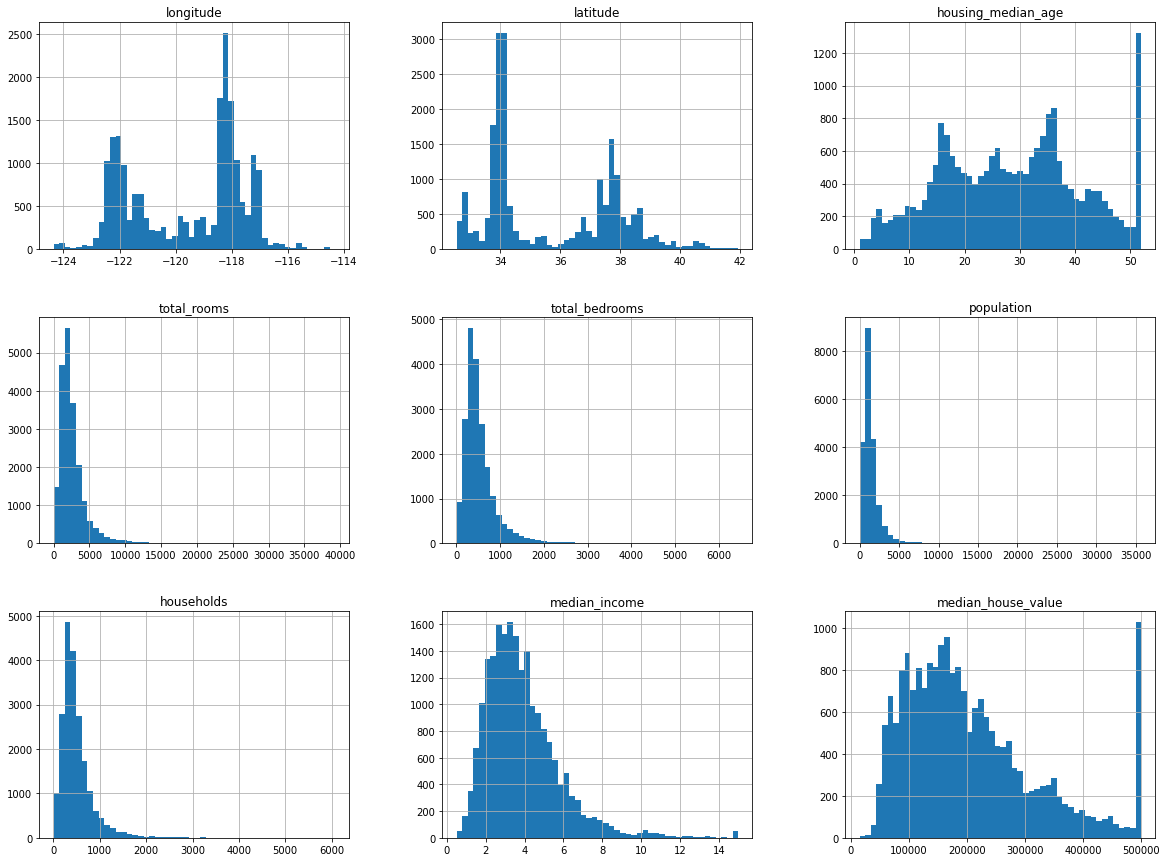

In [18]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
# Notes
# > Scale are different
#> Some of the features having right skewed data and we need to transform them properly.

In [23]:
import utils
from importlib import  reload

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
train_set.shape

(16512, 10)

In [26]:
test_set.shape

(4128, 10)

In [27]:
# Splitting based on the normal approach

In [28]:
# Testing with stratified sampling

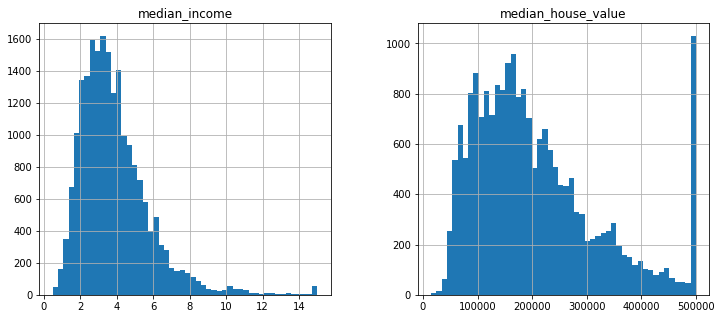

In [32]:
import matplotlib.pyplot as plt
df[['median_income', 'median_house_value']].hist(bins=50, figsize=(12,5))
plt.show()

In [33]:
# converting median_income into categorical 

In [40]:
import numpy as np

In [41]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

<Axes: >

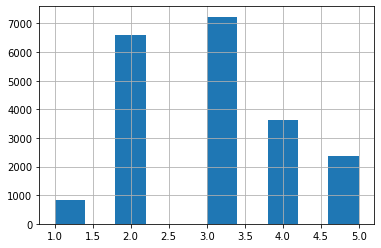

In [43]:
df['income_cat'].hist()

In [44]:
# doing the stratified sampling

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [47]:
strat_train_set.shape

(16512, 11)

In [51]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [49]:
strat_test_set.shape

(4128, 11)

In [50]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [52]:
# ratio preserved/

# Data Visualization

In [55]:
housing_data = strat_train_set.copy()

In [56]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [62]:
housing_data.drop(columns="income_cat", index=0, inplace=True)

In [63]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


## Univariate 

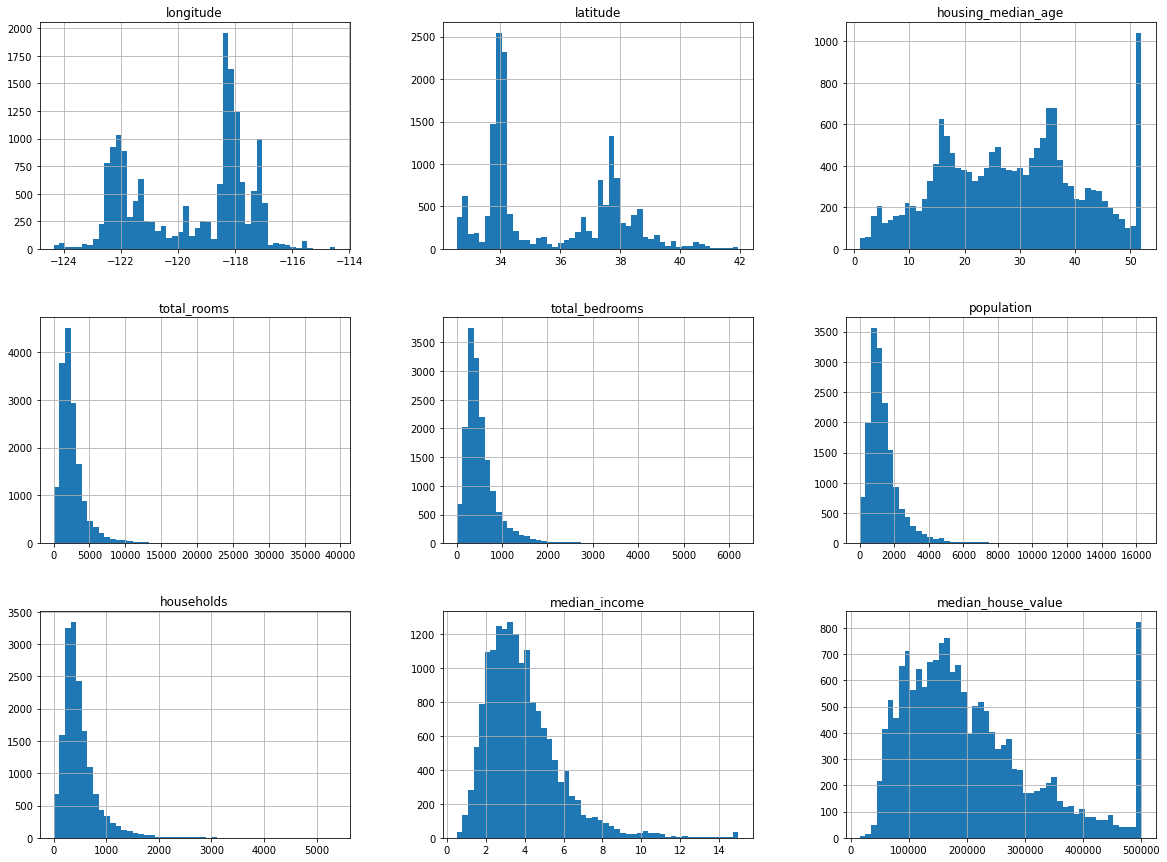

In [65]:
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

In [66]:
# we need to transform features having +ve skewness.

longitude                Axes(0.125,0.657941;0.227941x0.222059)
latitude              Axes(0.398529,0.657941;0.227941x0.222059)
housing_median_age    Axes(0.672059,0.657941;0.227941x0.222059)
total_rooms              Axes(0.125,0.391471;0.227941x0.222059)
total_bedrooms        Axes(0.398529,0.391471;0.227941x0.222059)
population            Axes(0.672059,0.391471;0.227941x0.222059)
households                  Axes(0.125,0.125;0.227941x0.222059)
median_income            Axes(0.398529,0.125;0.227941x0.222059)
median_house_value       Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

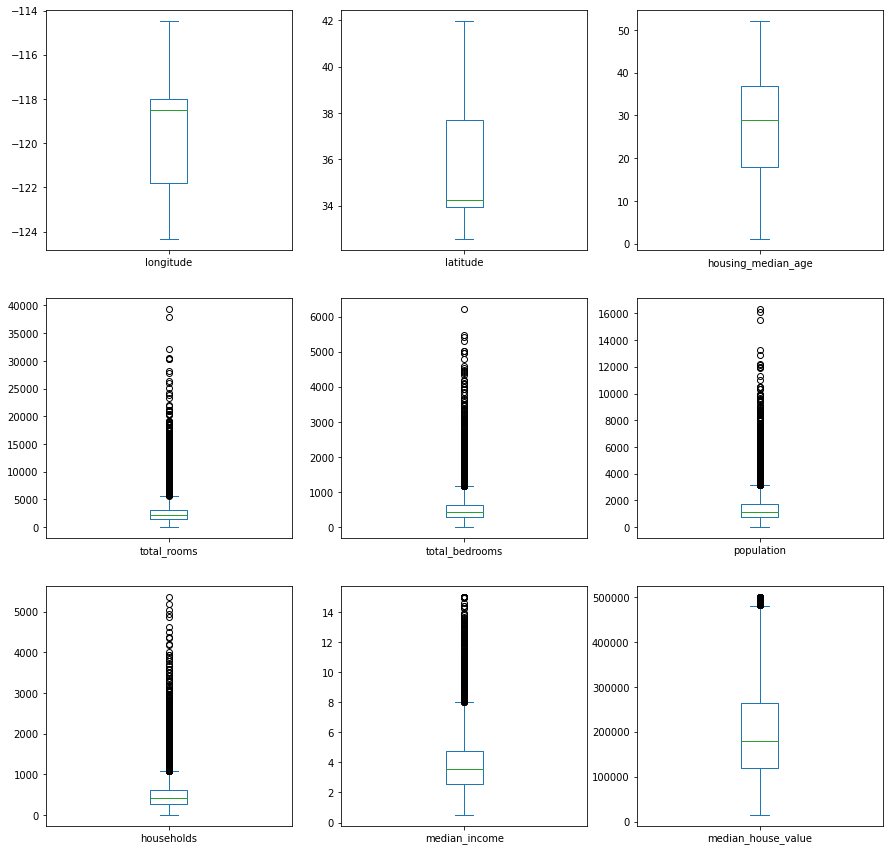

In [69]:

housing_data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 15))

# Bivariate

In [70]:
# latitude and longitude

<Axes: xlabel='longitude', ylabel='latitude'>

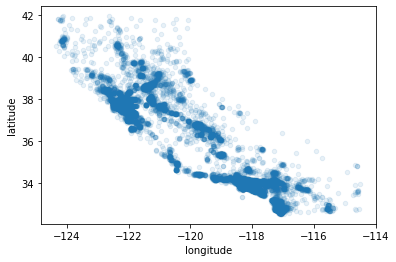

In [72]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [73]:
# looking the price along with the above scatter plot

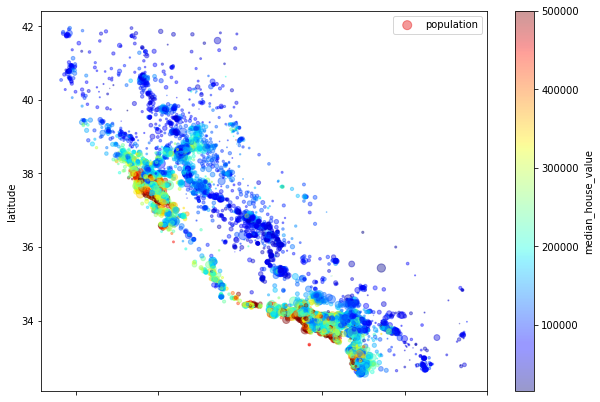

In [79]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing_data["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [81]:
# price highly depends on the latitude and longitude parameters
# and probably on 	ocean_proximity

<Axes: title={'center': 'median_house_value'}, xlabel='ocean_proximity'>

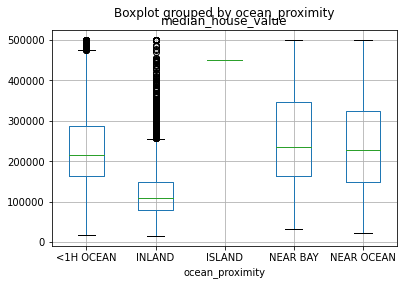

In [82]:
housing_data.boxplot(by="ocean_proximity", column="median_house_value")

# Correlation

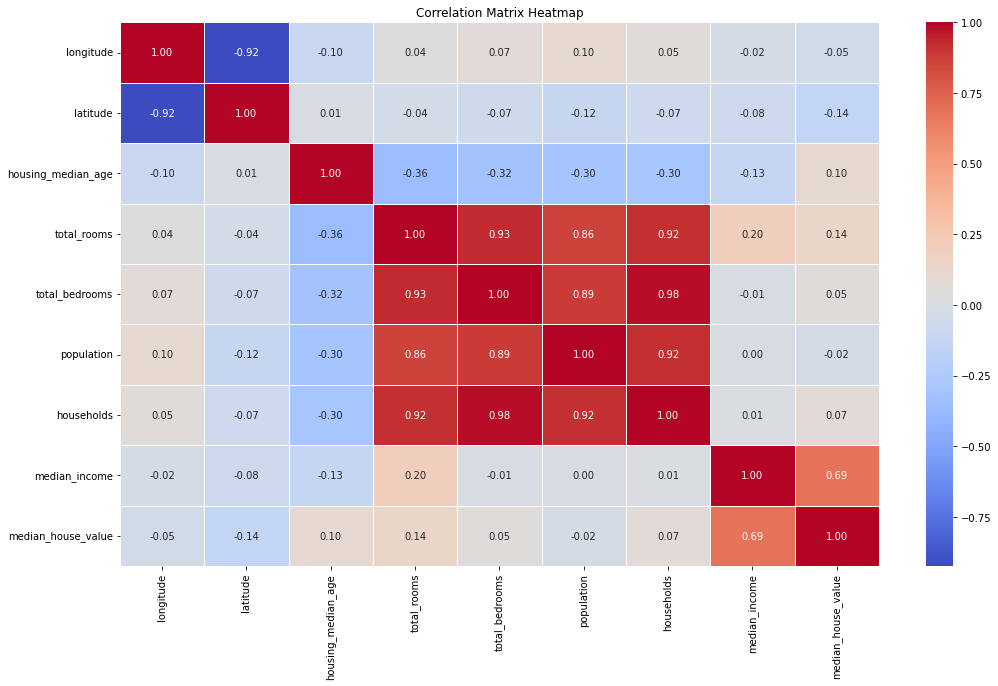

In [84]:
corr_matrix = housing_data.select_dtypes(include=['float']).corr()

import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the heatmap
plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [85]:
# looking at the correlation between the median house value

In [86]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688286
total_rooms           0.137581
housing_median_age    0.102064
households            0.071565
total_bedrooms        0.054771
population           -0.020026
longitude            -0.050697
latitude             -0.139743
Name: median_house_value, dtype: float64

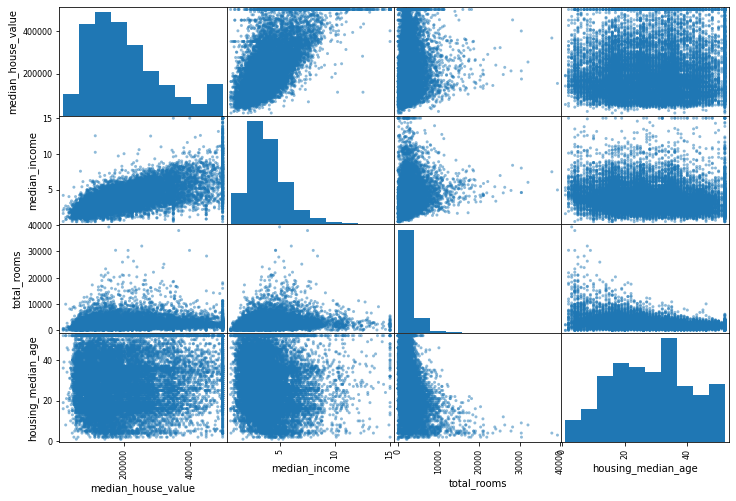

In [89]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

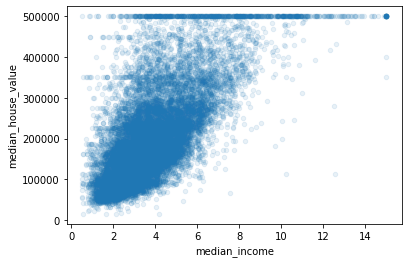

In [90]:
housing_data.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [91]:
# median income has high correlation between median_house value

# FeatureEngineering

In [93]:
# we can try to combine feature to create new one or use some mathematical relationships to create new features as well

In [94]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


In [95]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]

In [99]:
corr_matrix = housing_data.select_dtypes(include=['float']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688286
rooms_per_household         0.143607
total_rooms                 0.137581
housing_median_age          0.102064
households                  0.071565
total_bedrooms              0.054771
population                 -0.020026
population_per_household   -0.038217
longitude                  -0.050697
latitude                   -0.139743
bedrooms_per_room          -0.256293
Name: median_house_value, dtype: float64